In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [177]:
ldc = pd.read_csv('../Resources/LDC.csv')
ldc

,L,MON,SZN,LDC_SST_GFDL_SPEAR,LDC_SST_COLA-CESM1,LDC_SST_NCEP-CFSv2,LDC_SST_NASA_GMAO_062,LDC_SST_NASA_GEOSS2S,LDC_SST_CanSIPS-IC3,CanCM4i-IC3
0,1.5,1,JFM,26.73096,26.71652,26.86674,26.46154,NaN,NaN,NaN
1,2.5,1,FMA,27.14719,26.92505,27.20096,26.68970,NaN,NaN,NaN
2,3.5,1,MAM,27.52304,27.27699,27.74135,27.05849,NaN,NaN,NaN
3,4.5,1,AMJ,27.58538,27.54860,28.10581,27.28336,NaN,NaN,NaN
4,5.5,1,MJJ,27.22283,27.39318,27.94013,27.14282,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
115,6.5,12,MJJ,27.13952,27.41127,27.93196,27.12803,NaN,NaN,NaN
116,7.5,12,JJA,26.58239,26.86315,27.23512,26.70004,NaN,NaN,NaN
117,8.5,12,JAS,26.13566,26.12935,26.45772,NaN,NaN,NaN,NaN
118,9.5,12,ASO,25.94629,25.56973,NaN,NaN,NaN,NaN,NaN


In [178]:
ldc_spear = ldc[['L','SZN','LDC_SST_GFDL_SPEAR']]
ldc_spear

,L,SZN,LDC_SST_GFDL_SPEAR
0,1.5,JFM,26.73096
1,2.5,FMA,27.14719
2,3.5,MAM,27.52304
3,4.5,AMJ,27.58538
4,5.5,MJJ,27.22283
...,...,...,...
115,6.5,MJJ,27.13952
116,7.5,JJA,26.58239
117,8.5,JAS,26.13566
118,9.5,ASO,25.94629


In [179]:
ldc_spear_average = ldc_spear.groupby('SZN')['LDC_SST_GFDL_SPEAR'].mean().reset_index()
#seasons_order = ['JFM', 'FMA', 'MAM', 'AMJ','MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ', 'DJF']
#ldc_spear_average['SZN'] = pd.Categorical(average['SZN'], categories=seasons_order, ordered=True)
#ldc_spear_average = ldc_spear_average.sort_values('SZN').reset_index(drop=True)
ldc_spear_average

,SZN,LDC_SST_GFDL_SPEAR
0,AMJ,27.528853
1,ASO,26.190461
2,DJF,26.193369
3,FMA,26.912610
4,JAS,26.318831
5,JFM,26.420483
6,JJA,26.713477
7,MAM,27.379756
8,MJJ,27.221241
9,NDJ,26.213481


In [180]:
lead_time = 1.5 
ldc_spear_lead1 = ldc_spear[ldc_spear['L'] == lead_time]
ldc_spear_lead1

,L,SZN,LDC_SST_GFDL_SPEAR
0,1.5,JFM,26.73096
10,1.5,FMA,27.21934
20,1.5,MAM,27.70002
30,1.5,AMJ,27.77826
40,1.5,MJJ,27.45836
50,1.5,JJA,26.97469
60,1.5,JAS,26.67118
70,1.5,ASO,26.59793
80,1.5,SON,26.69006
90,1.5,OND,26.66120


In [181]:
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
ldc_spear_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_ldc = ldc_spear[ldc_spear['L'] == i].copy()
    lead = int(i)
    temp = lead
    
    offset = ' '
    
    # Modify the last 'temp' rows' 'SZN' safely
    if not filtered_ldc.empty and temp > 0:
        for index in range(1, temp + 1):
            if index <= len(filtered_ldc):
                row_index = filtered_ldc.index[-index]
                filtered_ldc.at[row_index, 'SZN'] += offset

    # Store the modified DataFrame in the dictionary
    ldc_spear_dfs[f'lead{lead}'] = filtered_ldc

# Access the modified DataFrame for a specific lead time
ldc_spear_dfs['lead1']


,L,SZN,LDC_SST_GFDL_SPEAR
0,1.5,JFM,26.73096
10,1.5,FMA,27.21934
20,1.5,MAM,27.70002
30,1.5,AMJ,27.77826
40,1.5,MJJ,27.45836
50,1.5,JJA,26.97469
60,1.5,JAS,26.67118
70,1.5,ASO,26.59793
80,1.5,SON,26.69006
90,1.5,OND,26.66120


In [182]:
obs_nino3_4 = pd.read_csv('../Resources/obs_nino3_4.csv')

obs_nino3_4_duplicate = obs_nino3_4.copy()

offset = ' '  # Offset by max X value + 1 to avoid overlap
obs_nino3_4_duplicate['SZN'] = obs_nino3_4_duplicate['SZN'] + offset

obs_nino3_4_doubled = pd.concat([obs_nino3_4, obs_nino3_4_duplicate], ignore_index=True)

obs_nino3_4_doubled

,MON,NINO3.4,runningAvg,SZN,NINO3.4_L3,VARIANCE_L3
0,1,26.512258,NaN,DJF,26.648667,1.230987
1,2,26.752333,26.849197,JFM,26.859889,0.911147
2,3,27.283000,27.284667,FMA,27.284667,0.569984
3,4,27.818667,27.678333,MAM,27.678333,0.338432
4,5,27.933333,27.826222,AMJ,27.826222,0.256750
5,6,27.726667,27.651111,MJJ,27.651111,0.281245
6,7,27.293333,27.291667,JJA,27.291667,0.401165
7,8,26.855000,26.955667,JAS,26.955667,0.576438
8,9,26.718667,26.763333,ASO,26.763333,0.797956
9,10,26.716333,26.712556,SON,26.712556,1.057599


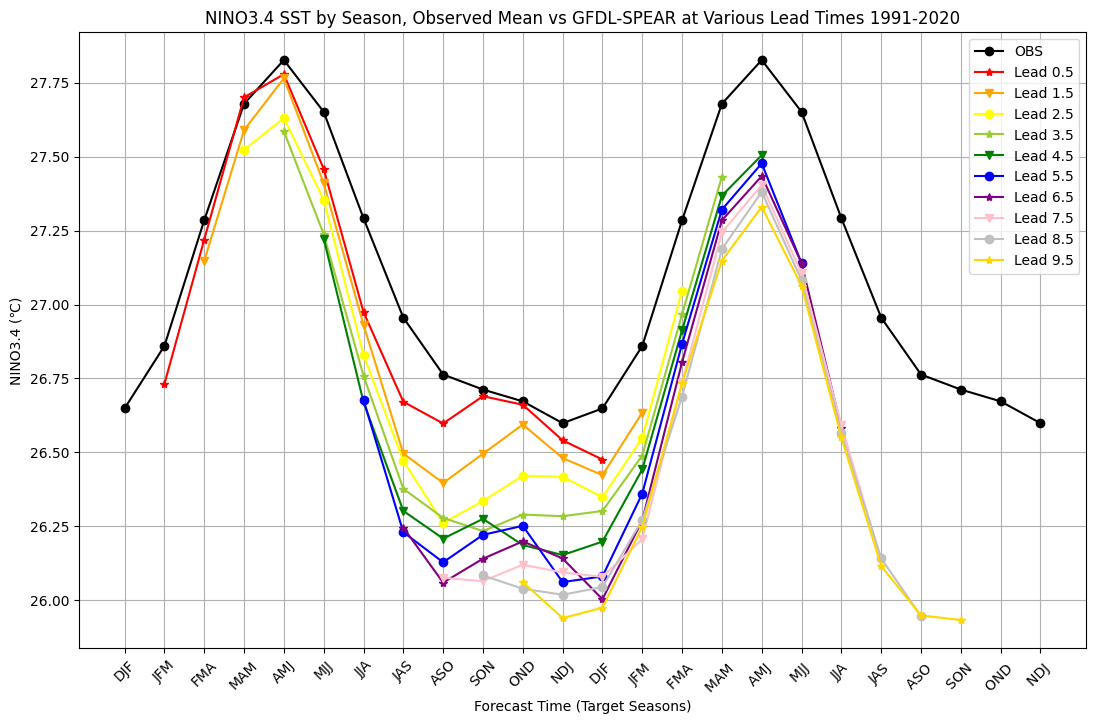

In [183]:
plt.figure(figsize=(13, 8))

plt.plot(obs_nino3_4_doubled['SZN'], obs_nino3_4_doubled['NINO3.4_L3'], marker='o', linestyle='-', color='black', label='OBS')
"""
plt.plot(ldc_spear_dfs['lead1']['SZN'], ldc_spear_dfs['lead1']['LDC_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='red')
plt.plot(ldc_spear_dfs['lead2']['SZN'], ldc_spear_dfs['lead2']['LDC_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='orange')
plt.plot(ldc_spear_dfs['lead3']['SZN'], ldc_spear_dfs['lead3']['LDC_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='y')
plt.plot(ldc_spear_dfs['lead4']['SZN'], ldc_spear_dfs['lead4']['LDC_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='yellowgreen')
plt.plot(ldc_spear_dfs['lead5']['SZN'], ldc_spear_dfs['lead5']['LDC_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='green')
plt.plot(ldc_spear_dfs['lead6']['SZN'], ldc_spear_dfs['lead6']['LDC_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='blue')
plt.plot(ldc_spear_dfs['lead7']['SZN'], ldc_spear_dfs['lead7']['LDC_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='purple')
plt.plot(ldc_spear_dfs['lead8']['SZN'], ldc_spear_dfs['lead8']['LDC_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='pink')
plt.plot(ldc_spear_dfs['lead9']['SZN'], ldc_spear_dfs['lead9']['LDC_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='silver')
plt.plot(ldc_spear_dfs['lead10']['SZN'], ldc_spear_dfs['lead10']['LDC_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='gold')
"""

colors = ['red', 'orange', 'yellow', 'yellowgreen', 'green', 'blue', 'purple', 'pink', 'silver', 'gold']
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i, color in enumerate(colors, start=1):
    j = float(i)-0.5
    if i % 3 == 0:
        plt.plot(ldc_spear_dfs[f'lead{i}']['SZN'], ldc_spear_dfs[f'lead{i}']['LDC_SST_GFDL_SPEAR'], marker='o', linestyle='-', color=color, label=f'Lead {j}')
    elif i % 3 == 1:
        plt.plot(ldc_spear_dfs[f'lead{i}']['SZN'], ldc_spear_dfs[f'lead{i}']['LDC_SST_GFDL_SPEAR'], marker='*', linestyle='-', color=color, label=f'Lead {j}')
    elif i % 3 == 2:
        plt.plot(ldc_spear_dfs[f'lead{i}']['SZN'], ldc_spear_dfs[f'lead{i}']['LDC_SST_GFDL_SPEAR'], marker='v', linestyle='-', color=color, label=f'Lead {j}')
    #plt.plot(ldc_spear_dfs[f'lead{i}']['SZN'], ldc_spear_dfs[f'lead{i}']['LDC_SST_GFDL_SPEAR'], marker='o', linestyle='-', color=color, label=f'{labels[i-1]}')


# Customize the plot
plt.title('NINO3.4 SST by Season, Observed Mean vs GFDL-SPEAR at Various Lead Times 1991-2020')
plt.xlabel('Forecast Time (Target Seasons)')
plt.ylabel('NINO3.4 (℃)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

#customize graph to resemble model graph
#use four colors with different symbol, different thickness level of lines
#crosscheck val=e

In [184]:
"""
plt.figure(figsize=(13, 10))
plt.plot(obs_nino3_4_doubled['SZN'], obs_nino3_4_doubled['NINO3.4_L3'], marker='o', linestyle='-', color='black')
plt.plot(ldc_spear_dfs['lead1']['SZN'], ldc_spear_dfs['lead1']['VAR_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='red')
plt.plot(ldc_spear_dfs['lead2']['SZN'], ldc_spear_dfs['lead2']['VAR_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='orange')
plt.plot(ldc_spear_dfs['lead3']['SZN'], ldc_spear_dfs['lead3']['VAR_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='y')
plt.plot(ldc_spear_dfs['lead4']['SZN'], ldc_spear_dfs['lead4']['VAR_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='yellowgreen')
plt.plot(ldc_spear_dfs['lead5']['SZN'], ldc_spear_dfs['lead5']['VAR_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='green')
plt.plot(ldc_spear_dfs['lead6']['SZN'], ldc_spear_dfs['lead6']['VAR_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='blue')
plt.plot(ldc_spear_dfs['lead7']['SZN'], ldc_spear_dfs['lead7']['VAR_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='purple')
plt.plot(ldc_spear_dfs['lead8']['SZN'], ldc_spear_dfs['lead8']['VAR_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='pink')
plt.plot(ldc_spear_dfs['lead9']['SZN'], ldc_spear_dfs['lead9']['VAR_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='silver')
plt.plot(ldc_spear_dfs['lead10']['SZN'], ldc_spear_dfs['lead10']['VAR_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='gold')

# Customize the plot
plt.title('Observed Mean NINO3.4 SST by Season, 1991-2020')
plt.xlabel('Forecast Time (Target Seasons)')
plt.ylabel('NINO3.4 (℃)')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

#draw same graph for all lead months from 0.5-10.5 """
#not sure how to calculate variance for this graph. 

"\nplt.figure(figsize=(13, 10))\nplt.plot(obs_nino3_4_doubled['SZN'], obs_nino3_4_doubled['NINO3.4_L3'], marker='o', linestyle='-', color='black')\nplt.plot(ldc_spear_dfs['lead1']['SZN'], ldc_spear_dfs['lead1']['VAR_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='red')\nplt.plot(ldc_spear_dfs['lead2']['SZN'], ldc_spear_dfs['lead2']['VAR_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='orange')\nplt.plot(ldc_spear_dfs['lead3']['SZN'], ldc_spear_dfs['lead3']['VAR_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='y')\nplt.plot(ldc_spear_dfs['lead4']['SZN'], ldc_spear_dfs['lead4']['VAR_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='yellowgreen')\nplt.plot(ldc_spear_dfs['lead5']['SZN'], ldc_spear_dfs['lead5']['VAR_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='green')\nplt.plot(ldc_spear_dfs['lead6']['SZN'], ldc_spear_dfs['lead6']['VAR_SST_GFDL_SPEAR'], marker='o', linestyle='-', color='blue')\nplt.plot(ldc_spear_dfs['lead7']['SZN'], ldc_spear_dfs['lead7']['VAR_SST_GFDL_S